# Analysis of Mortgage Loans in New York

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("state_NY.csv")

/var/folders/km/vd961byj21d2vgpgtcvkn3940000gn/T/ipykernel_60397/1305725136.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("state_NY.csv")


In [3]:
# denial reason == 1111 is Equal 'Exempt'
df = df[df['denial_reason-1'] != 1111]

In [4]:
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,5493000YNV8IX4VD3X12,35614,NY,36005.0,3.600505e+10,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,...,NaN,NaN,NaN,2142,32.31,99000,109,339,411,70
1,2022,5493006O6Q2F0MR0ZM22,0,NY,NaN,NaN,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,0,0.00,0,0,0,0,0
2,2022,5493006O6Q2F0MR0ZM22,0,NY,NaN,NaN,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,0,0.00,0,0,0,0,0
3,2022,5493006O6Q2F0MR0ZM22,0,NY,NaN,NaN,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,0,0.00,0,0,0,0,0
4,2022,5493006O6Q2F0MR0ZM22,0,NY,NaN,NaN,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,0,0.00,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539194 entries, 0 to 548904
Data columns (total 99 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   activity_year                             539194 non-null  int64  
 1   lei                                       539194 non-null  object 
 2   derived_msa-md                            539194 non-null  int64  
 3   state_code                                539194 non-null  object 
 4   county_code                               537244 non-null  float64
 5   census_tract                              536752 non-null  float64
 6   conforming_loan_limit                     533402 non-null  object 
 7   derived_loan_product_type                 539194 non-null  object 
 8   derived_dwelling_category                 539194 non-null  object 
 9   derived_ethnicity                         539194 non-null  object 
 10  derived_race             

In [6]:
df.describe()

,activity_year,derived_msa-md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,539194.0,539194.000000,537244.000000,5.367520e+05,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,...,21822.000000,3870.000000,408.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000
mean,2022.0,37681.100379,36067.126497,3.606727e+10,2.337760,3.659036,1.976923,1.153952,10.775862,1.192751,...,4.611905,5.774677,6.676471,4366.574242,35.332140,105604.962036,115.275224,1089.091203,1391.191419,45.567072
std,0.0,20291.802644,31.377067,5.730391e+07,1.716855,13.610137,0.150148,0.440768,13.835401,0.394459,...,2.779067,2.692355,2.479049,1668.106482,27.658878,23796.976041,51.004567,544.188564,656.775520,23.609272
min,2022.0,0.000000,36001.000000,6.001431e+09,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.0,35004.000000,36047.000000,3.604705e+10,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,3.000000,4.000000,5.000000,3168.000000,13.730000,91200.000000,86.000000,671.000000,952.000000,37.000000
50%,2022.0,35614.000000,36065.000000,3.606502e+10,1.000000,0.000000,2.000000,1.000000,2.000000,1.000000,...,4.000000,6.000000,6.000000,4270.000000,25.700000,99000.000000,107.000000,1062.000000,1426.000000,52.000000
75%,2022.0,39100.000000,36091.000000,3.609106e+10,3.000000,1.000000,2.000000,1.000000,31.000000,1.000000,...,7.000000,9.000000,9.000000,5432.000000,48.230000,115700.000000,131.000000,1480.000000,1838.000000,64.000000
max,2022.0,99999.000000,36123.000000,4.820141e+10,8.000000,72.000000,2.000000,4.000000,32.000000,2.000000,...,9.000000,9.000000,9.000000,17222.000000,100.000000,146400.000000,292.000000,2946.000000,4742.000000,80.000000


<Axes: >

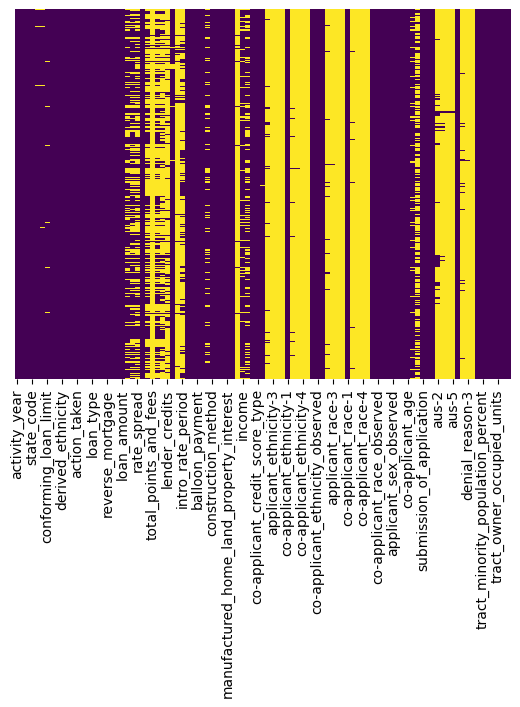

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0.5, 1.0, 'Correlation Heatmap')

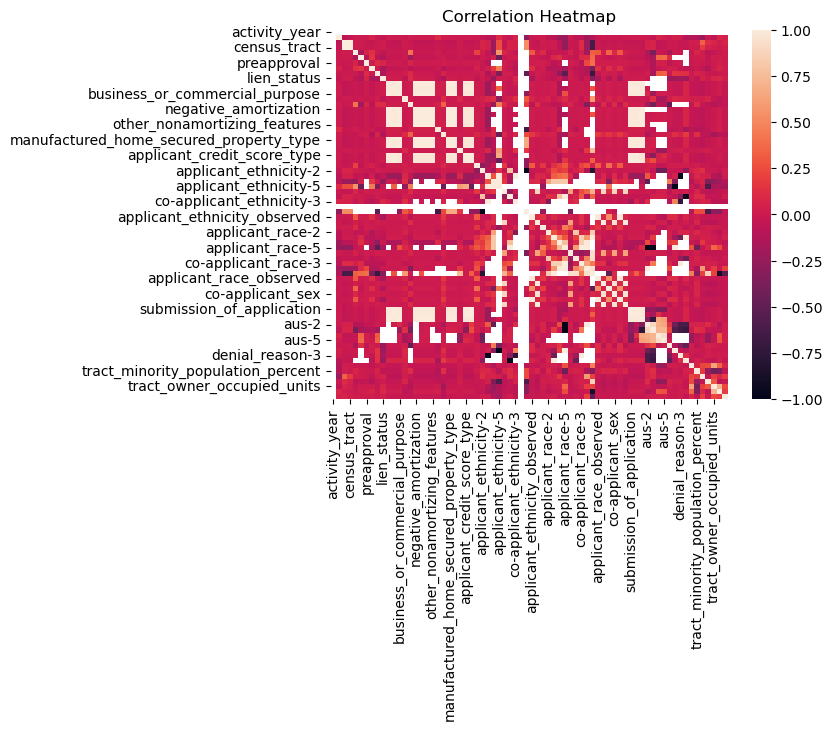

In [8]:
numeric_df = df.select_dtypes(include=['float64','int64'])
corr_matrix = numeric_df.corr()
heatmap = sns.heatmap(corr_matrix,vmin=-1,vmax=1)
heatmap.set_title("Correlation Heatmap")

# Categorical Data

In [9]:
categorical_columns = ['derived_loan_product_type','derived_dwelling_category','conforming_loan_limit','derived_ethnicity','derived_race', 'derived_sex', 'action_taken', 'purchaser_type', 'preapproval', 'loan_purpose', 
                        'reverse_mortgage', 'open-end_line_of_credit', 'business_or_commercial_purpose', 'hoepa_status', 'negative_amortization', 'interest_only_payment', 'balloon_payment',
                         'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest', 'debt_to_income_ratio', 'co-applicant_credit_score_type',
                       'applicant_age','co-applicant_age', 'initially_payable_to_institution', 'aus-1']

# CLEANUP

In [10]:
df_clean = df.drop(columns=[
    'applicant_age_above_62','co-applicant_age_above_62',
    'aus-2', 'aus-3', 'aus-4', 'aus-5',
    'denial_reason-2', 'denial_reason-3','denial_reason-4', 
    'activity_year', 'total_points_and_fees','county_code',
    'lei', 'multifamily_affordable_units', 'prepayment_penalty_term', 'state_code',
    'applicant_race-1','applicant_race-2', 'applicant_race-3','applicant_race-4', 'applicant_race-5', 'co-applicant_race-2', 'co-applicant_race-3', 'co-applicant_race-4','co-applicant_race-5',  # derived_race
    'applicant_sex','applicant_sex_observed','co-applicant_sex', 'co-applicant_sex_observed', # derived_sex
    'applicant_ethnicity-1','applicant_ethnicity-2','applicant_ethnicity-3', 'applicant_ethnicity-4','applicant_ethnicity-5','applicant_ethnicity_observed', 'co-applicant_ethnicity-1','co-applicant_ethnicity-2', 'co-applicant_ethnicity-3','co-applicant_ethnicity-4', 'co-applicant_ethnicity-5', 'co-applicant_ethnicity_observed', #derived_ethnicity
    'construction_method', 'total_units', # derived_dwelling_category
    'lien_status', 'loan_type', # derived_loan_product_type
    'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage', # derived_msa-md
    'tract_one_to_four_family_homes', 'submission_of_application', 'occupancy_type', 'other_nonamortizing_features', # ADAM
    'derived_msa-md' # NIKO
])

<Axes: >

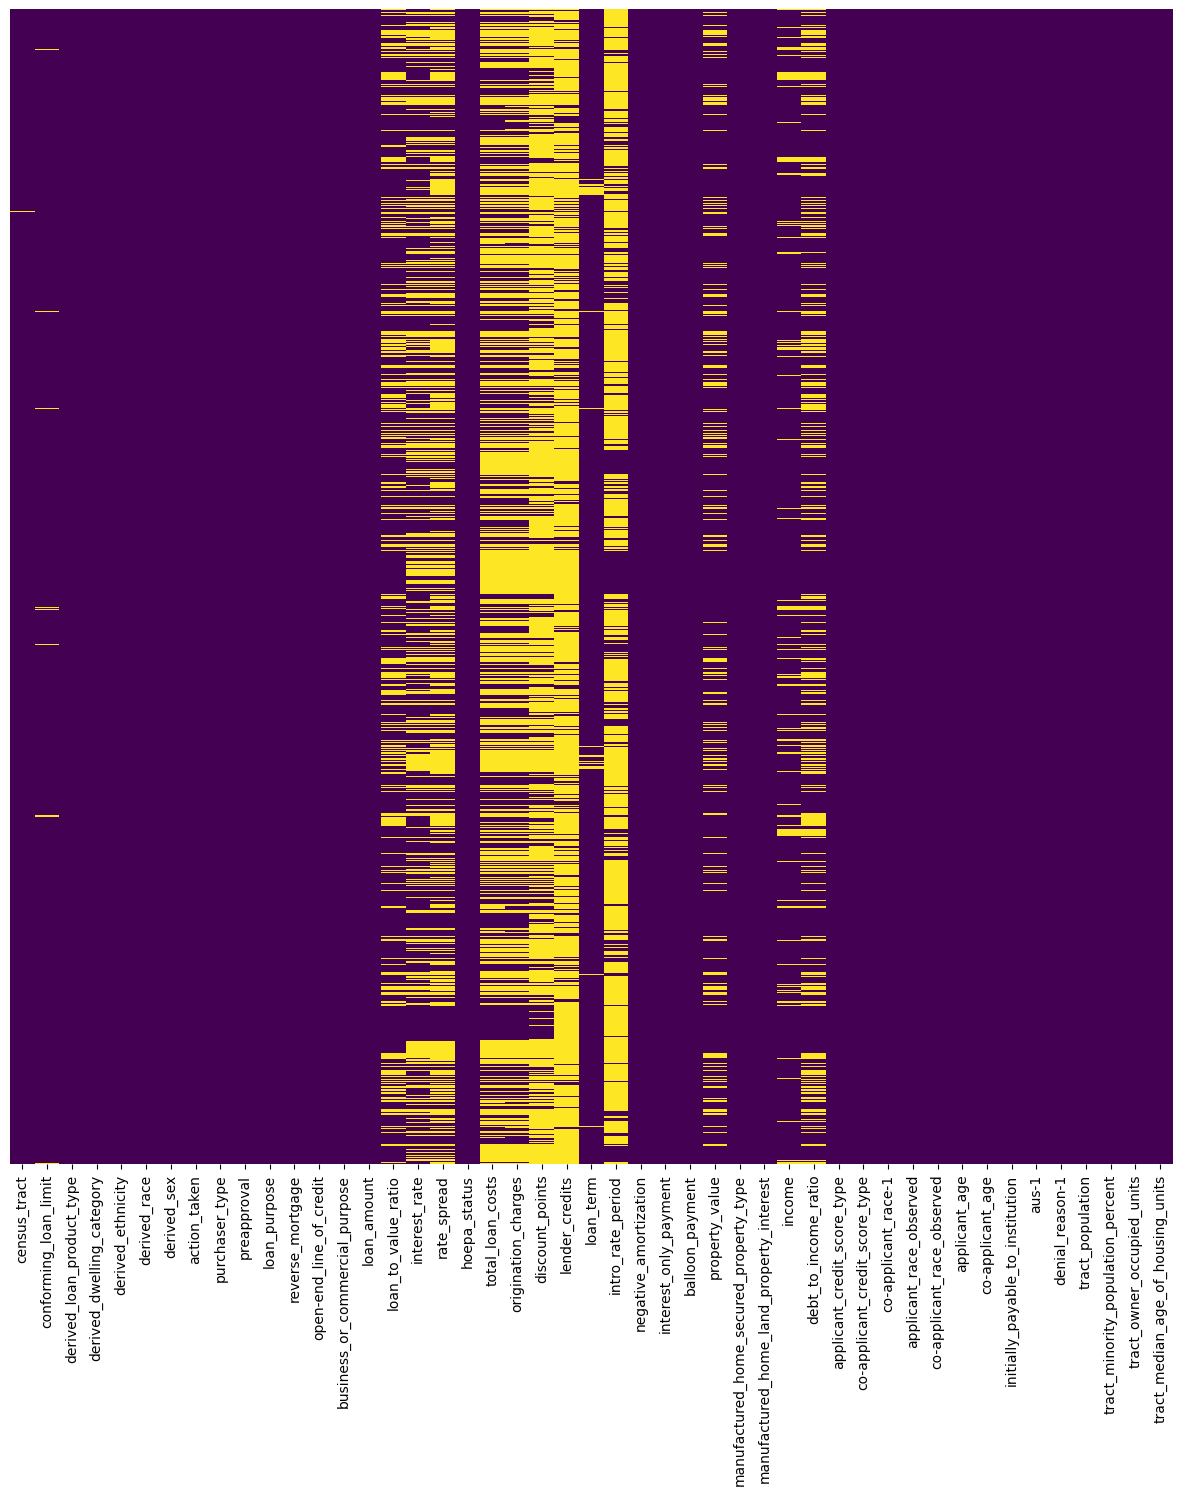

In [11]:
# Heatmap on all data.
plt.figure(figsize=(15, 15))
sns.heatmap(df_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

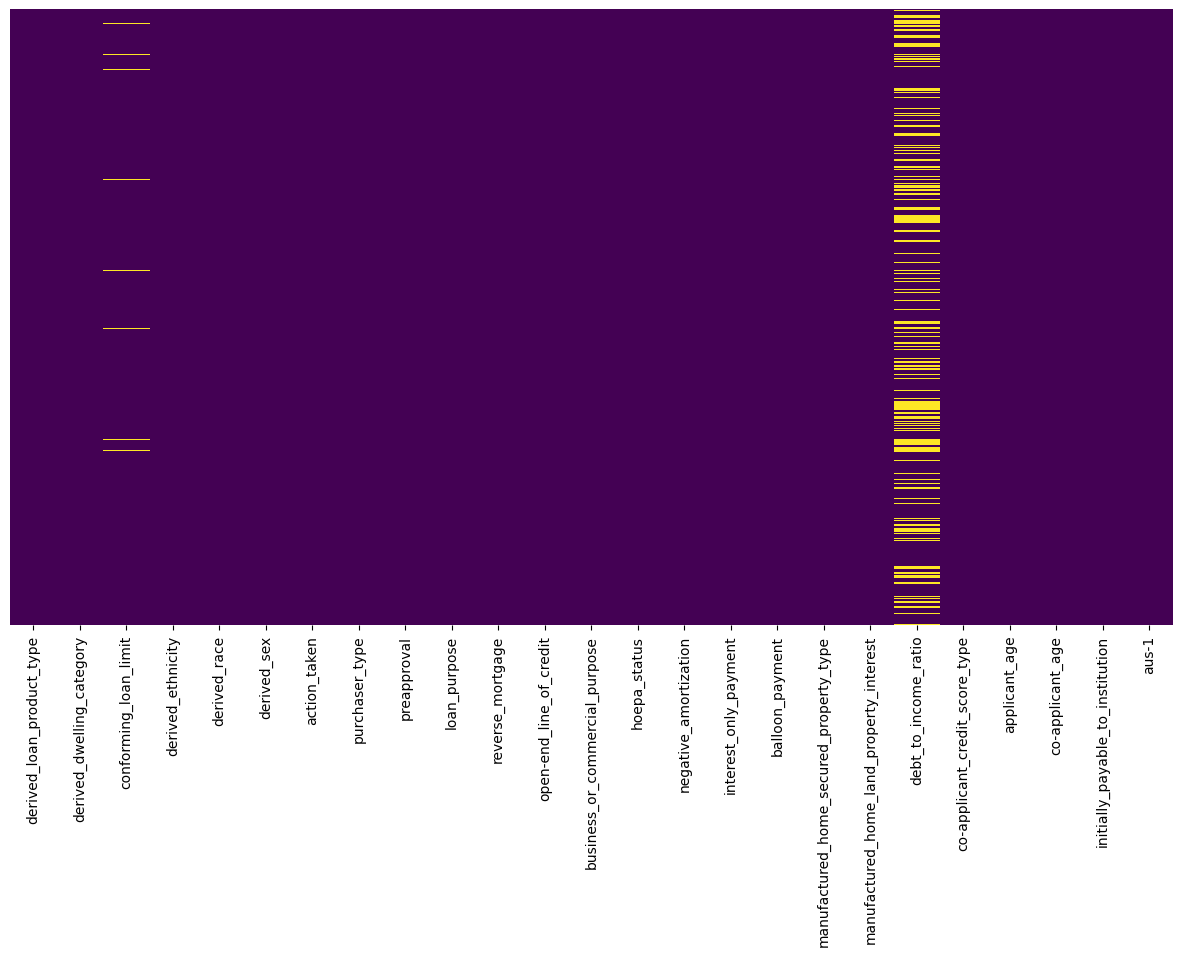

In [12]:
# Heatmap on categorical data.
plt.figure(figsize=(15, 8))
sns.heatmap(df_clean[categorical_columns].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

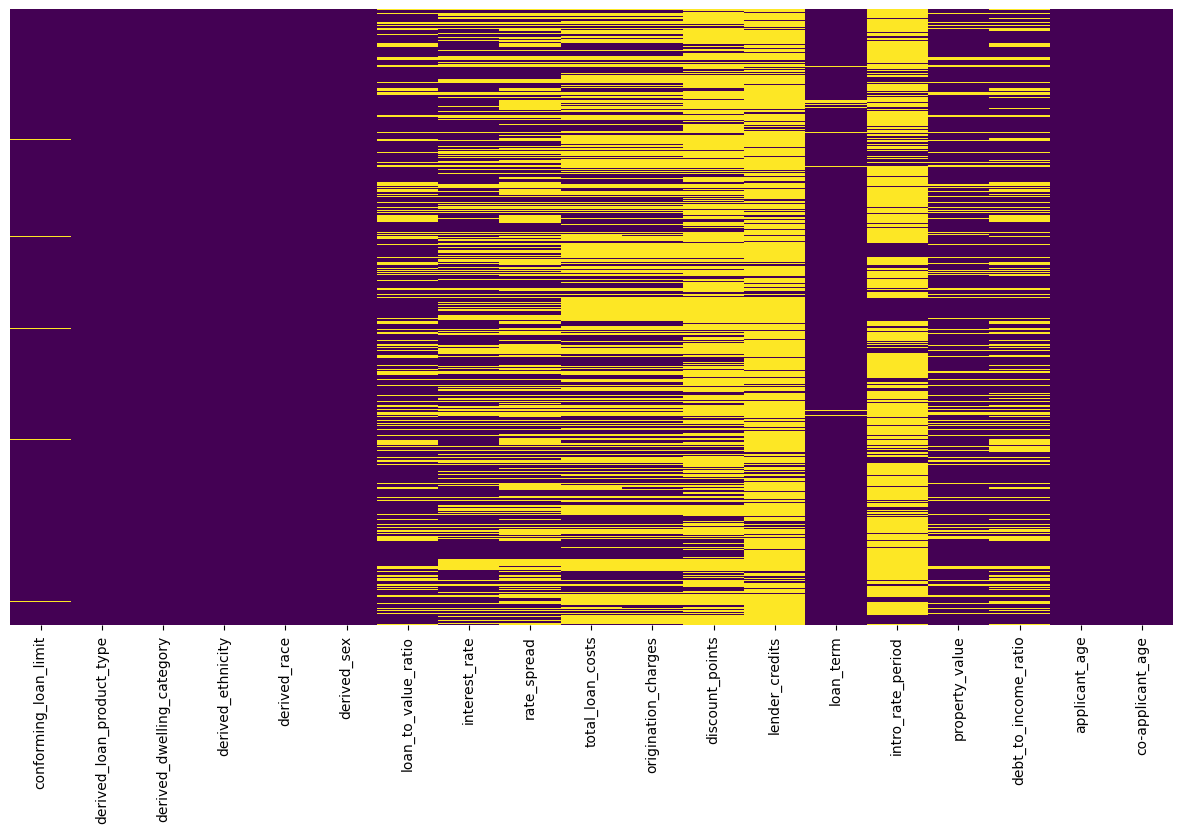

In [13]:
# Heatmap on object type data
plt.figure(figsize=(15, 8))
sns.heatmap(df_clean.select_dtypes(include=['object']).isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Heatmap on number type data excluding categorical columns
plt.figure(figsize=(15, 8))
sns.heatmap(df_clean.drop(columns=categorical_columns).select_dtypes(include=['int64','float64']).isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Columns after cleanup

In [ ]:
df_clean.info()

In [ ]:
df_clean.describe()

In [ ]:
corr_income = df_clean.corr(numeric_only=True)["income"]
corr_applicant_credit_score_type = df_clean.corr(numeric_only=True)["applicant_credit_score_type"]
corr_co_applicant_credit_score_type = df_clean.corr(numeric_only=True)["co-applicant_credit_score_type"]
corr_co_applicant_race_1 = df_clean.corr(numeric_only=True)["co-applicant_race-1"]
corr_applicant_race_observed = df_clean.corr(numeric_only=True)["applicant_race_observed"]
corr_co_applicant_race_observed = df_clean.corr(numeric_only=True)["co-applicant_race_observed"]
corr_initially_payable_to_institution = df_clean.corr(numeric_only=True)["initially_payable_to_institution"]
corr_aus_1 = df_clean.corr(numeric_only=True)["aus-1"]
corr_denial_reason_1 = df_clean.corr(numeric_only=True)["denial_reason-1"]
corr_tract_population = df_clean.corr(numeric_only=True)["tract_population"]
corr_tract_minority_population_percent = df_clean.corr(numeric_only=True)["tract_minority_population_percent"]
corr_tract_owner_occupied_units = df_clean.corr(numeric_only=True)["tract_owner_occupied_units"]
corr_tract_median_age_of_housing_units = df_clean.corr(numeric_only=True)["tract_median_age_of_housing_units"]

In [ ]:
corr_aus_1

In [ ]:
df_object = df_clean.select_dtypes(include=['object'])

In [ ]:
df_object

In [ ]:
df_obj_columns=['loan_to_value_ratio', 'interest_rate', 'rate_spread',
   'total_loan_costs', 'origination_charges', 'discount_points',
   'lender_credits', 'loan_term', 'intro_rate_period', 'property_value']

for column_name in df_obj_columns:
    df_clean[column_name] = df_clean[column_name].replace('Exempt', np.NaN).astype(np.float64)
    

In [ ]:
df_clean.info()

df_encoded_categorical.info()

# Correlation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

def analyze_categorical_association(df, col1, col2, plot_title=None):
    """
    Perform a chi-square test on two categorical columns and plot the contingency table.
    
    Parameters:
    - df: The DataFrame containing the data.
    - col1, col2: The names of the two categorical columns to analyze.
    - plot_title: An optional title for the plot.
    """
    def create_contingency_table(df, col1, col2):
        """Create a contingency table for two categorical columns."""
        contingency_table = pd.crosstab(df[col1], df[col2])
        return contingency_table

    def chi_square_test(df, col1, col2):
        """Perform a chi-square test on two categorical columns."""
        contingency_table = create_contingency_table(df, col1, col2)
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        return chi2, p, contingency_table

    # Perform the chi-square test
    chi2, p_value, contingency_table = chi_square_test(df, col1, col2)

    # Plotting the contingency table
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
    if plot_title:
        plt.title(plot_title)
    else:
        plt.title(f'Contingency Table for "{col1}" and "{col2}"')
    plt.xlabel(col2)
    plt.ylabel(col1)
    
    # Adding chi-square statistic and p-value below the plot
    plt.text(0.5, -0.2, f'Chi-square: {chi2:.2f}\np-value: {p_value:.2e}',
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=12, color='black')
    
    plt.show()


In [ ]:
for column in categorical_columns:
    analyze_categorical_association(df_clean, column, 'denial_reason-1', plot_title=f'Association between "{column}" and "denial_reason-1"')
    print("\n")

# Preprocessing Categorical -> Numeric

In [ ]:
from sklearn import preprocessing

# Converting all categorical variables into numerical

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 
df_encoded_categorical = df_clean.copy(deep=True)

# df_obj_columns contains columns with float64, NaN & 'Exempt' values and 'Exempt' values are converted to NaN
df_categorical_columns_no_obj = [column for column in categorical_columns if column not in df_obj_columns]


for column in categorical_columns:
    df_encoded_categorical[column] = label.fit_transform(df_encoded_categorical[column])

# OneHotEncoder on categorical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_clean_encoded_categorical = pd.get_dummies(df_clean,columns=categorical_columns)

In [ ]:
df_clean_encoded_categorical.info()

In [ ]:
df_clean_encoded_categorical.head()

In [ ]:
df_clean_encoded_categorical.describe()

# PCA on OneHotEncoded categorical without object types where all rows != NaN

In [ ]:
df_clean_object_columns = df_clean_encoded_categorical.select_dtypes(include=['object']).columns
df_clean_object_columns

In [ ]:
df_clean_encoded_categorical_without_objects = df_clean_encoded_categorical.drop(columns=df_clean_object_columns)
df_clean_encoded_categorical_without_objects.info()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC


df_clean_categorical_without_objects_dropna = df_clean_encoded_categorical_without_objects.dropna()

X = df_clean_categorical_without_objects_dropna.drop(columns=['denial_reason-1'])
y = df_clean_categorical_without_objects_dropna['denial_reason-1']
columns = df_clean_categorical_without_objects_dropna.columns


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

In [ ]:
pca = PCA()
pca.fit(X_train)
X_train_pca = pca.transform(X_train_scaler)
X_test_pca = pca.transform(X_test_scaler)

In [ ]:
# svm = SVC(kernel='linear', C=1)
# svm.fit(X_train_pca, y_train)
# svm_predictions = svm.predict(X_test_pca)

# print(classification_report(y_test, rf_predictions, target_names=names))